# Базы данных и SQL, работа с бд из Python

# Реляционные базы данных

Табличное представление свойственно для реляционных БД. 

База данных (БД) - это специальным образом организованная совокупность данных о некоторой предметной области, хранящаяся во внешней памяти компьютера.

В таких таблицах все поля не только уникально проименованы, но и имеют строгий тип данных, а также могут иметь ограничения по уникальности и связи с другими таблицами.

Реляционные базы данных являются основой хранения данных множества ИС, их знание является основой современного (и не очень) программирования настоящих систем которыми пользуются настоящие люди.

## Работа из python: sqlite3 + pandas

In [27]:
import sqlite3
import pandas as pd
import random

# Создание подключения к базе данных SQLite
conn = sqlite3.connect('sqlite_example.db')
cursor = conn.cursor()

# Создание таблицы clients с пятью столбцами
cursor.execute('''
CREATE TABLE IF NOT EXISTS clients (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    age INTEGER,
    country TEXT,
    balance REAL,
    join_date TEXT
)
''')

# Список случайных имён
names = ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan', 'Judy']
countries = ['USA', 'Canada', 'Germany', 'France', 'UK', 'Spain', 'Italy', 'Russia', 'China', 'Japan']

# Заполнение таблицы случайными данными
for _ in range(10):
    name = random.choice(names) # используем выбор имени с возвращением с помощью модуля random
    age = random.randint(18, 70)
    country = random.choice(countries)
    balance = round(random.uniform(1000, 10000), 2) # случайное значение баланса на счёте из равномерного распределения 
    join_date = f"202{random.randint(0, 3)}-{random.randint(1, 12):02d}-{random.randint(1, 28):02d}"
    cursor.execute('''
    INSERT INTO clients (name, age, country, balance, join_date)
    VALUES (?, ?, ?, ?, ?)
    ''', (name, age, country, balance, join_date))

# Подтверждение изменений
conn.commit()

### SQL-запросы к созданной таблице

### Запрос select * from clients

In [26]:
query_1 = pd.read_sql_query("SELECT * FROM clients", conn)
query_1

,id,name,age,country,balance,join_date
0,1,Judy,68,Italy,8436.20,2020-09-21
1,2,Alice,57,Italy,3292.14,2020-12-11
2,3,Grace,64,Italy,5315.55,2022-04-09
3,4,Diana,62,Germany,8337.65,2023-10-16
4,5,Frank,61,UK,9665.18,2023-09-08
5,6,Ivan,54,UK,8763.42,2021-05-12
6,7,Charlie,45,Germany,3959.94,2021-07-19
7,8,Eve,69,Italy,3179.61,2022-05-15
8,9,Charlie,45,France,3274.31,2023-09-09
9,10,Grace,60,Canada,3914.78,2023-08-15


### Запрос с условием WHERE


In [23]:
query_2 = pd.read_sql_query("SELECT * FROM clients WHERE age > 30", conn)
query_2

,id,name,age,country,balance,join_date
0,1,Judy,68,Italy,8436.20,2020-09-21
1,2,Alice,57,Italy,3292.14,2020-12-11
2,3,Grace,64,Italy,5315.55,2022-04-09
3,4,Diana,62,Germany,8337.65,2023-10-16
4,5,Frank,61,UK,9665.18,2023-09-08
5,6,Ivan,54,UK,8763.42,2021-05-12
6,7,Charlie,45,Germany,3959.94,2021-07-19
7,8,Eve,69,Italy,3179.61,2022-05-15
8,9,Charlie,45,France,3274.31,2023-09-09
9,10,Grace,60,Canada,3914.78,2023-08-15


### Запрос с использованием условной структуры CASE WHEN THEN


In [24]:
query_3 = pd.read_sql_query('''
SELECT name, age, 
       CASE 
           WHEN age < 25 THEN 'Young'
           WHEN age BETWEEN 25 AND 50 THEN 'Middle-Aged'
           ELSE 'Senior'
       END as age_category
FROM clients
''', conn)
query_3

,name,age,age_category
0,Judy,68,Senior
1,Alice,57,Senior
2,Grace,64,Senior
3,Diana,62,Senior
4,Frank,61,Senior
5,Ivan,54,Senior
6,Charlie,45,Middle-Aged
7,Eve,69,Senior
8,Charlie,45,Middle-Aged
9,Grace,60,Senior


### Запрос с использованием группировки


In [25]:
query_4 = pd.read_sql_query('''
SELECT country, COUNT(*) as total_clients
FROM clients
GROUP BY country
''', conn)
query_4

,country,total_clients
0,Canada,2
1,China,9
2,France,3
3,Germany,4
4,Italy,4
5,Japan,2
6,Russia,1
7,Spain,1
8,UK,4


### Запрос с использованием HAVING к аггрегированным значениям

In [29]:
query_5 = pd.read_sql_query('''
SELECT country, AVG(balance) as avg_balance
FROM clients
GROUP BY country
HAVING avg_balance > 5000
''', conn)
query_5

,country,avg_balance
0,China,5463.657000
1,Italy,6082.786667
2,Japan,6963.250000
3,Spain,7571.365000
4,UK,8086.333333
5,USA,5571.650000


### Запрос с использованием аггрегирующей оконной функции


In [28]:
query_6 = pd.read_sql_query('''
SELECT id, name, age, country, balance, 
       AVG(balance) OVER(PARTITION BY country) as avg_country_balance
FROM clients
''', conn)
query_6

,id,name,age,country,balance,avg_country_balance
0,10,Grace,60,Canada,3914.78,4766.340000
1,29,Charlie,69,Canada,3837.54,4766.340000
2,33,Eve,65,Canada,6546.70,4766.340000
3,11,Diana,28,China,6317.75,5463.657000
4,14,Bob,59,China,8207.64,5463.657000
5,19,Eve,19,China,3789.04,5463.657000
6,21,Alice,51,China,6074.53,5463.657000
7,22,Ivan,61,China,4526.65,5463.657000
8,23,Charlie,53,China,7805.06,5463.657000
9,24,Bob,48,China,7881.73,5463.657000


### Запрос с использованием ранжирующей оконной функцией DENSE_RANK()

In [30]:
query_7 = pd.read_sql_query('''
SELECT id, name, age, country, balance, 
       DENSE_RANK() OVER(ORDER BY balance DESC) as rank
FROM clients
''', conn)
query_7

,id,name,age,country,balance,rank
0,39,Diana,47,UK,9944.89,1
1,13,Frank,67,Japan,9710.16,2
2,5,Frank,61,UK,9665.18,3
3,37,Heidi,57,Spain,9225.49,4
4,35,Heidi,65,Italy,9193.41,5
5,15,Alice,33,UK,8824.77,6
6,6,Ivan,54,UK,8763.42,7
7,1,Judy,68,Italy,8436.20,8
8,4,Diana,62,Germany,8337.65,9
9,14,Bob,59,China,8207.64,10


### Закрытие подключения (обращения) к базе данных

In [ ]:
conn.close()

# Работа из python: pandas

Самым классическим инструментом для работы с датасетами является pandas. Помимо того чтобы работать с данныими из электронных таблиц, он может забрать данные из sql-query, если в качестве параметра ему передать соединение с базой.

Данные, полученные с помощью sql select можно сразу же загрузить в датафрейм. у pandas есть такой инструмент.

In [74]:
import pandas as pd
import pandas.io.sql as psql

In [75]:
connection = psycopg2.connect("dbname=test user=student1 password=student1 host=212.109.218.158 port=5432")
dataframe = psql.read_sql('SELECT * FROM files JOIN person ON files.owner = person.id;', connection)
dataframe.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_7944\2617395107.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe = psql.read_sql('SELECT * FROM files JOIN person ON files.owner = person.id;', connection)


,id,file_name,mime_type,size_bytes,created,owner,id,first_name,last_name,email,gender,country
0,3,AugueQuam.doc,application/msword,948,2021-11-23,1,1,Antonia,Joddins,ajoddins0@washingtonpost.com,Female,Mongolia
1,4,QuisTurpisSed.tiff,image/tiff,1742,2021-12-20,1,1,Antonia,Joddins,ajoddins0@washingtonpost.com,Female,Mongolia
2,5,Sociis.ppt,application/vnd.ms-powerpoint,2571,2021-12-21,11,11,Raynell,Wand,rwanda@zdnet.com,Female,Poland
3,6,SemPraesentId.mpeg,video/mpeg,3151,2021-07-27,2,2,Kirsti,Kenington,kkenington1@google.com,Female,China
4,7,Ut.mp3,audio/x-mpeg-3,9656,2021-05-31,3,3,Erasmus,Trunby,etrunby2@narod.ru,Male,Malaysia


In [76]:
dataframe

,id,file_name,mime_type,size_bytes,created,owner,id,first_name,last_name,email,gender,country
0,3,AugueQuam.doc,application/msword,948,2021-11-23,1,1,Antonia,Joddins,ajoddins0@washingtonpost.com,Female,Mongolia
1,4,QuisTurpisSed.tiff,image/tiff,1742,2021-12-20,1,1,Antonia,Joddins,ajoddins0@washingtonpost.com,Female,Mongolia
2,5,Sociis.ppt,application/vnd.ms-powerpoint,2571,2021-12-21,11,11,Raynell,Wand,rwanda@zdnet.com,Female,Poland
3,6,SemPraesentId.mpeg,video/mpeg,3151,2021-07-27,2,2,Kirsti,Kenington,kkenington1@google.com,Female,China
4,7,Ut.mp3,audio/x-mpeg-3,9656,2021-05-31,3,3,Erasmus,Trunby,etrunby2@narod.ru,Male,Malaysia
5,8,PellentesqueViverra.mp3,audio/x-mpeg-3,9447,2021-12-06,1,1,Antonia,Joddins,ajoddins0@washingtonpost.com,Female,Mongolia
6,9,OrciLuctusEt.tiff,image/x-tiff,2539,2021-02-03,4,4,Vonny,Grishmanov,vgrishmanov3@newyorker.com,Male,France
7,11,Pede.avi,video/msvideo,1923,2021-07-14,4,4,Vonny,Grishmanov,vgrishmanov3@newyorker.com,Male,France
8,12,JustoEuMassa.tiff,image/tiff,2928,2021-06-13,1,1,Antonia,Joddins,ajoddins0@washingtonpost.com,Female,Mongolia
9,13,Ullamcorper.txt,text/plain,4684,2021-03-27,2,2,Kirsti,Kenington,kkenington1@google.com,Female,China


### Простой анализ используя pandas

In [77]:
dataframe[["country", "mime_type", "size_bytes", "gender"]]

,country,mime_type,size_bytes,gender
0,Mongolia,application/msword,948,Female
1,Mongolia,image/tiff,1742,Female
2,Poland,application/vnd.ms-powerpoint,2571,Female
3,China,video/mpeg,3151,Female
4,Malaysia,audio/x-mpeg-3,9656,Male
5,Mongolia,audio/x-mpeg-3,9447,Female
6,France,image/x-tiff,2539,Male
7,France,video/msvideo,1923,Male
8,Mongolia,image/tiff,2928,Female
9,China,text/plain,4684,Female


In [78]:
dataframe = psql.read_sql('SELECT country, mime_type, size_bytes, gender FROM files JOIN person ON files.owner = person.id;', connection)
dataframe

C:\Users\HP\AppData\Local\Temp\ipykernel_7944\1183119644.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe = psql.read_sql('SELECT country, mime_type, size_bytes, gender FROM files JOIN person ON files.owner = person.id;', connection)


,country,mime_type,size_bytes,gender
0,Mongolia,application/msword,948,Female
1,Mongolia,image/tiff,1742,Female
2,Poland,application/vnd.ms-powerpoint,2571,Female
3,China,video/mpeg,3151,Female
4,Malaysia,audio/x-mpeg-3,9656,Male
5,Mongolia,audio/x-mpeg-3,9447,Female
6,France,image/x-tiff,2539,Male
7,France,video/msvideo,1923,Male
8,Mongolia,image/tiff,2928,Female
9,China,text/plain,4684,Female


In [79]:
dataframe.where(dataframe["mime_type"]=="audio/x-mpeg-3").dropna()

,country,mime_type,size_bytes,gender
4,Malaysia,audio/x-mpeg-3,9656.0,Male
5,Mongolia,audio/x-mpeg-3,9447.0,Female


In [80]:
dataframe[["country", "mime_type", "size_bytes", "gender"]].sort_values("size_bytes", ascending=False).head()

,country,mime_type,size_bytes,gender
19,China,video/x-mpeg,9904,Male
16,China,video/x-mpeg,9904,Male
4,Malaysia,audio/x-mpeg-3,9656,Male
5,Mongolia,audio/x-mpeg-3,9447,Female
13,Malaysia,application/pdf,8207,Male


In [81]:
sum_by_country = dataframe[["country", "mime_type", "size_bytes", "gender"]].groupby('country')['country', 'size_bytes'].sum().sort_values("size_bytes", ascending=False)
sum_by_country

C:\Users\HP\AppData\Local\Temp\ipykernel_7944\4231305113.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_country = dataframe[["country", "mime_type", "size_bytes", "gender"]].groupby('country')['country', 'size_bytes'].sum().sort_values("size_bytes", ascending=False)
C:\Users\HP\AppData\Local\Temp\ipykernel_7944\4231305113.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_by_country = dataframe[["country", "mime_type", "size_bytes", "gender"]].groupby('country')['country', 'size_bytes'].sum().sort_values("size_bytes", ascending=False)


,size_bytes
country,
China,41714
Mongolia,20913
Malaysia,17863
France,4462
Poland,2571


Text(0, 0.5, 'bytes')

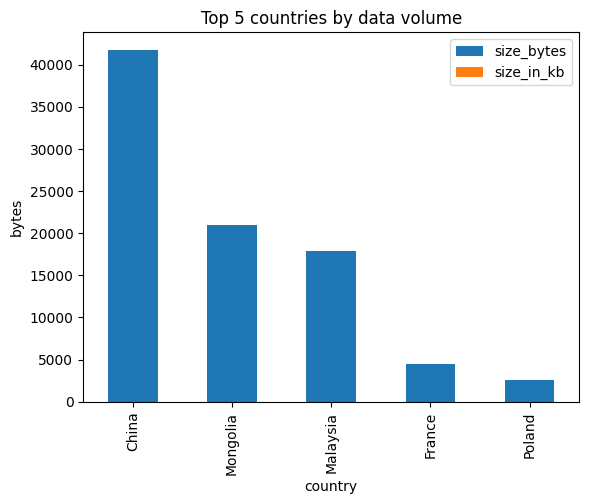

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
sum_by_country.plot.bar(stacked=True);
plt.title('Top 5 countries by data volume')
plt.xlabel('country')
plt.ylabel('bytes')

Text(0, 0.5, 'Kbytes')

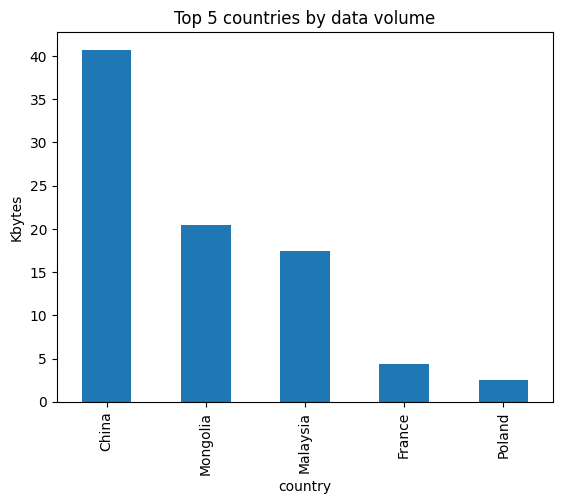

In [87]:
sum_by_country["size_in_kb"] =  sum_by_country["size_bytes"] / 1024
sum_by_country["size_in_kb"].plot.bar(stacked=True);
plt.title('Top 5 countries by data volume')
plt.xlabel('country')
plt.ylabel('Kbytes')